<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/NLP_projs/customer_churn_prediction/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description:

Customer churn is a term used when a customer decides to stop using the services of the business. Businesses do customer churn analysis all the time because it is very helpful for a company if they learn which customers are about to leave.

This aim of this project is to train a machine learning model on the available data to train machine learning models that will predict a high accuracy which customers are about to churn, which in turn will help the business owner in making useful marketing decisions.

> You can find the original project/challenge details on [Kaggle](https://www.kaggle.com/c/customer-churn-prediction-2020/overview)

## Data description:

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents.

**Columns**

* 'customerID'
* 'gender'
* 'SeniorCitizen' : Whether the customer is a senior citizen or not (1, 0)
* 'Partner' : Whether the customer has a partner or not (Yes, No)
* 'Dependents' : Whether the customer has dependents or not (Yes, No)
* 'tenure': Number of months the customer has stayed with the company
* 'PhoneService': Whether the customer has a phone service or not (Yes, No)
* 'MultipleLines': Whether the customer has multiple lines or not (Yes, No, No phone service)
* 'InternetService': Whether the customer has multiple lines or not (Yes, No, No phone service)
* 'OnlineSecurity': Whether the customer has online security or not (Yes, No, No internet service)
* 'OnlineBackup': Whether the customer has online backup or not (Yes, No, No internet service)
* 'DeviceProtection':Whether the customer has device protection or not (Yes, No, No internet service)
* 'TechSupport': Whether the customer has tech support or not (Yes, No, No internet service)
* 'StreamingTV': Whether the customer has streaming TV or not (Yes, No, No internet service)
* 'StreamingMovies' : Whether the customer has streaming movies or not (Yes, No, No internet service)
* 'Contract': The contract term of the customer (Month-to-month, One year, Two year)
* 'PaperlessBilling': Whether the customer has paperless billing or not (Yes, No)
* 'PaymentMethod': The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* 'MonthlyCharges': The amount charged to the customer monthly
* 'TotalCharges': The total amount charged to the customer
* 'Churn': Whether the customer churned or not (Yes or No)



> # Load and preprocess the data

In [37]:
# Import libraries

import zipfile
import pandas as pd
import numpy as np
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
# Decompress the dataset

path_to_zip_file = '/content/archive.zip'
directory_to_extract_to = '/content/'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [2]:
# Load the Data and take a look at the first samples

data_url = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

data = pd.read_csv(data_url)
data.drop('customerID', axis=1, inplace= True )
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Data columns

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Infos of the data

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Describe the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


> ## Preprocess the data

We use the LabelEncoder from scikit-learn to convert text labels--Churn to integers 0, 1.



In [3]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
data['Churn'] = lbl_enc.fit_transform(data.Churn.values)

In [4]:
# replace null values with nan
data.replace('',np.nan,inplace=True)

In [6]:
# replace null values with nan
data.replace(' ',np.nan,inplace=True)

In [7]:
# drop nan values in the data
data.dropna(axis=0, how='any', inplace=True)

In [ ]:
# Use one of the following commands to change the dtypes

#data = data.infer_objects()
#data.convert_dtypes()

In [8]:
## Or you can use
data['TotalCharges'] = data['TotalCharges'].astype(float)
#data['TotalCharges'].astype(float)

In [ ]:
# Change the TotalCharges column type: object -> float

dum_list = []
a = 0
for i in data['TotalCharges']:
  try: 
    a +=1
    i = float(i)
  #print(i)
    dum_list.append(i)
  #print(a)
  except:
        print("Invalid data.")

data['TotalCharges']= dum_list



In [ ]:
# Infos of the data after a quick cleaning

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# Describe the data after a quick cleaning

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
churn_class,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [9]:
# Preprocess the other columns

df= data.copy()
#df.drop('churn_class', axis=1, inplace= True)

col_uniques = {}

for col in df.columns:
  print('Uniques of the',col,'column:\n' , df[col].unique())
  col_uniques[col]= df[col].unique()

Uniques of the gender column:
 ['Female' 'Male']
Uniques of the SeniorCitizen column:
 [0 1]
Uniques of the Partner column:
 ['Yes' 'No']
Uniques of the Dependents column:
 ['No' 'Yes']
Uniques of the tenure column:
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Uniques of the PhoneService column:
 ['No' 'Yes']
Uniques of the MultipleLines column:
 ['No phone service' 'No' 'Yes']
Uniques of the InternetService column:
 ['DSL' 'Fiber optic' 'No']
Uniques of the OnlineSecurity column:
 ['No' 'Yes' 'No internet service']
Uniques of the OnlineBackup column:
 ['Yes' 'No' 'No internet service']
Uniques of the DeviceProtection column:
 ['No' 'Yes' 'No internet service']
Uniques of the TechSupport column:
 ['No' 'Yes' 'No internet service']
Uniques of the StreamingTV column:
 ['No' 'Yes' 'No internet service']
Uniques of t

In [10]:
# Choose the columns that need to be preprocessed
lbl_enc = LabelEncoder()
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

def data_encoding(df, column_list, lbl_enc):
  df_new = df.copy()
  df_new[column_list] = df_new[column_list].apply(lbl_enc.fit_transform)
  df_new[column_list] = df_new[column_list].apply(pd.to_numeric, errors='coerce')
  return df_new

df_enc = data_encoding(df, cols, lbl_enc)
df_enc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [ ]:
# Describe the data after a quick cleaning

df_enc.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00
OnlineBackup,7032.0,0.905859,0.880394,0.00,0.0000,1.000,2.0000,2.00


In [ ]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

> # Exploratory Data Analysis (EDA)

In [ ]:
## ref: https://www.kaggle.com/code/omarmostafataha/customer-churn-eda-seaborn-and-plotly-streamlit
#This function takes one column and visualize plotly Pie chart
def pie(df,col):
    data=df[col].value_counts()
    fig=px.pie(data,values=data.values,names=data.index,title=f"{col} Pie Plot",width=400);
    plt.gcf().set_size_inches((18, 10))
    fig.show()

#This function takes one column and Hue then visualize seaborn Histogram 
def hist(col,set_hue=None):
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=col,kde=True,hue=set_hue,multiple='stack');
    plt.title(f'{col} Distribution')
    plt.show()

#This function takes one column and Hue then visualize seaborn countplot 
def count(col,set_hue=None):
    plt.figure(figsize=(6,6))
    sns.countplot(data=df,x=df[col],hue=set_hue);
    plt.show();

#This function takes dataframe , 1:4 columns ,hue and palette then visualize seaborn countplots
def count_group(df,cols,set_hue=None,set_palette=None):
    colors=['red','green','blue','yellow']
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i]
                      ,color=colors[i]
                      ,hue=set_hue
                      ,palette=set_palette)
        ax[i].set_title(f'{col} Count Plot')

    plt.show()

#This function is to show churn rate as a bar plot
def churn_rate(df,col,hue=None):
    sns.barplot(data=df,x=col,y='Churn',hue=hue,ci=None)
    plt.title(f'{col} Churn Rate')
    plt.show()

In [ ]:
# check the number of null values per column
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


not_churned:  5163 , churned:  1869


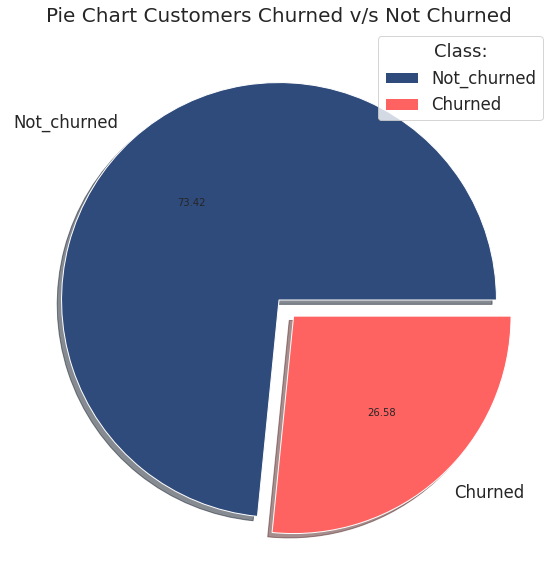

In [ ]:
# Check the class imbalance:

not_churned = data[data['Churn']=='No']['Churn'].count()
churned = data[data['Churn']=='Yes']['Churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

#
my_colors = ['#2f4b7c','#ff6361']   #lightblue      # 'lightsteelblue'] #, 'silver']
labels  = ['Not_churned','Churned']
my_explode = (0, 0.1)
plt.pie([not_churned,churned], labels=labels,autopct='%.2f', startangle=0, shadow=True, colors=my_colors , explode=my_explode,  ) # colors='red',labeldistance=1)  # 
plt.title('Pie Chart Customers Churned v/s Not Churned', fontsize = 20)
plt.legend(title = 'Class:', loc='best' )
plt.gcf().set_size_inches((18, 10))
plt.show()

> Check this [link](https://www.learnui.design/tools/data-color-picker.html#palette) for more colors

In [ ]:
# # Checking Imbalance in Data

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_grey2 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"
primary_red = "#ff6361"

primary_green = px.colors.qualitative.Plotly[2]

In [ ]:
# Now we are going to take a look about the target distribution and the messages length.

balance_counts = df_enc.groupby('Churn')['Churn'].agg('count').values
balance_counts

array([5163, 1869])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Not_churned'],
    y=[balance_counts[0]],
    name='Not_churned',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['Churned'],
    y=[balance_counts[1]],
    name='Churned',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    font_family="Times New Roman",
    title = {
         'text': "Target distribution - Chrun",
         'y':0.9, # new
         'x':0.5,
         'xanchor': 'center',
         'yanchor': 'top' # new
        },
    title_font_family="Times New Roman",
    font=dict(
        #family="Courier New, monospace",
        size=20)  # Set the font size here
        #color="RebeccaPurple"
    
    #title='<span style="font-size:32px;text-align: center"; font-family:Times New Roman"> Target distribution by Chrun </span>'
)
fig.show()

'''fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)

font=dict(
            family="Arial",
            size=20,
            color='#000000'
        )

'''



'fig.update_layout(\n    font_family="Courier New",\n    font_color="blue",\n    title_font_family="Times New Roman",\n    title_font_color="red",\n    legend_title_font_color="green"\n)\n\nfont=dict(\n            family="Arial",\n            size=20,\n            color=\'#000000\'\n        )\n\n'

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'churn_class'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


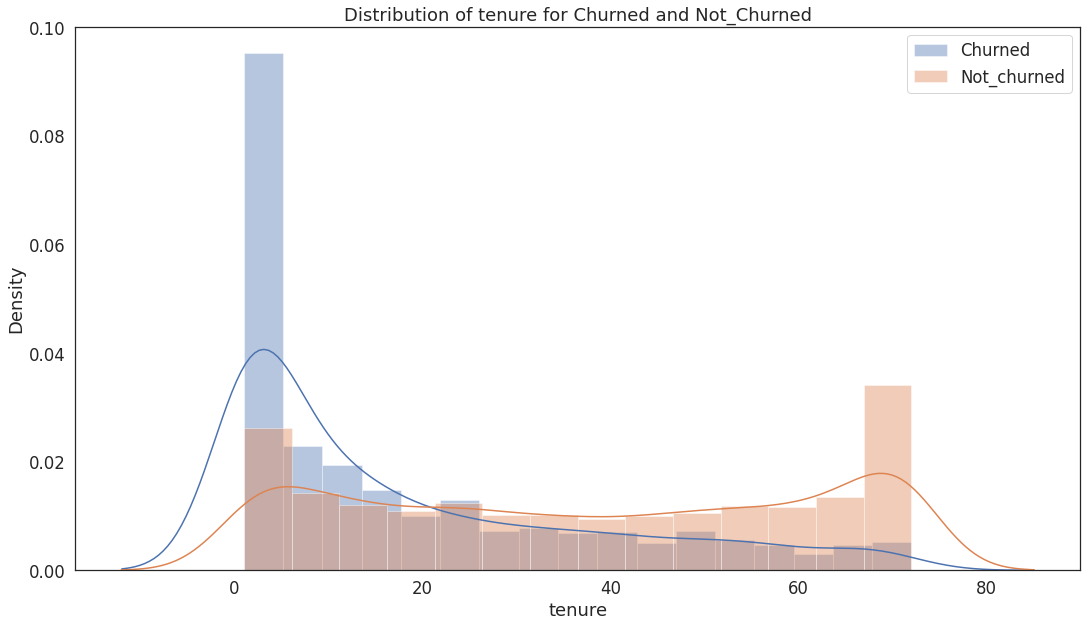

In [ ]:
### Visualizing the distribution of some features for both the classes:

# Plotting tenfor both the class labels
tenure_churned = data[data['Churn']=='Yes']['tenure']
tenure_not_churned =data[data['Churn']=='No']['tenure']
sns.distplot(tenure_churned,label='Churned') # hist=False
sns.distplot(tenure_not_churned,label='Not_churned') # hist=False
plt.title('Distribution of tenure for Churned and Not_Churned')
plt.legend()
plt.gcf().set_size_inches((18, 10))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


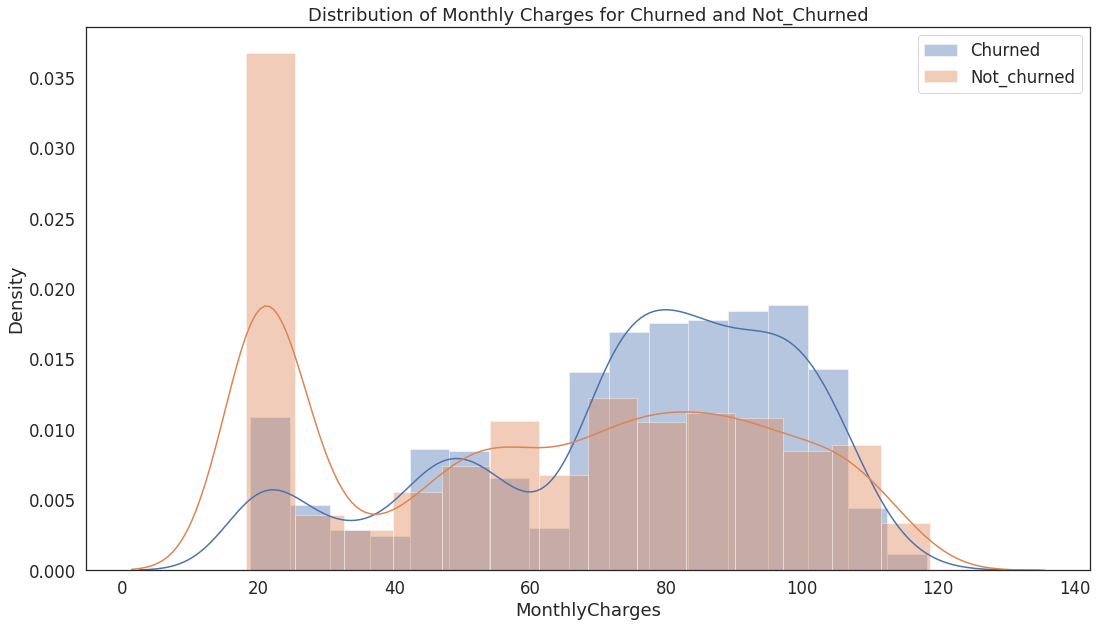

In [ ]:
# Plotting MonthlyCharges both the class labels

MonthlyCharges_churned = data[data['Churn']=='Yes']['MonthlyCharges']
MonthlyCharges_not_churned =data[data['Churn']=='No']['MonthlyCharges']
sns.distplot(MonthlyCharges_churned,label='Churned')
sns.distplot(MonthlyCharges_not_churned,label='Not_churned')
plt.title('Distribution of Monthly Charges for Churned and Not_Churned')
plt.legend()
plt.gcf().set_size_inches((18, 10))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


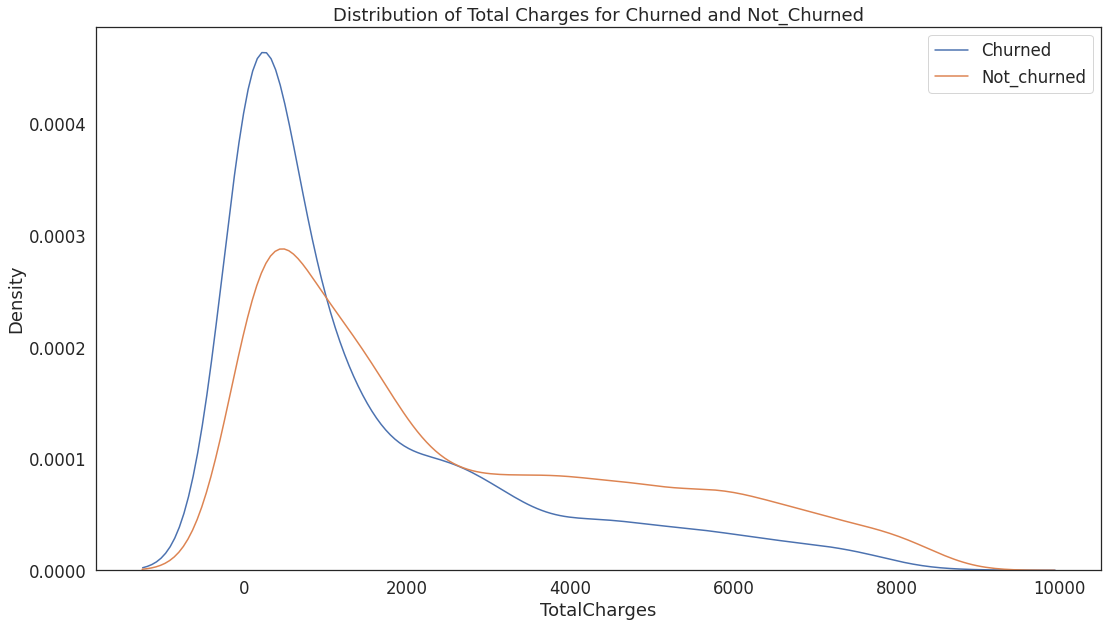

In [ ]:
# Plotting Total Charges both the class labels

TotalCharges_churned = data[data['Churn']=='Yes']['TotalCharges']
TotalCharges_not_churned =data[data['Churn']=='No']['TotalCharges']
sns.distplot(TotalCharges_churned,label='Churned', hist=False)
sns.distplot(TotalCharges_not_churned,label='Not_churned', hist= False)
plt.title('Distribution of Total Charges for Churned and Not_Churned')
plt.legend()
plt.gcf().set_size_inches((18, 10))
plt.show()

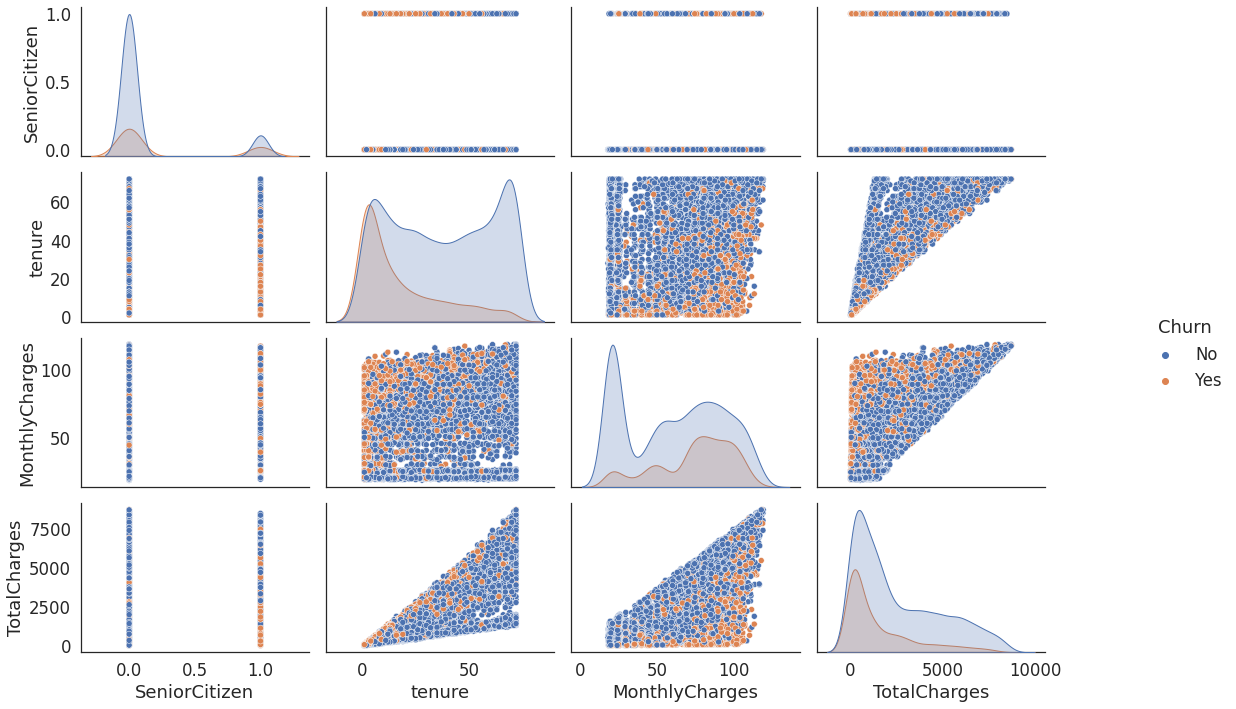

In [ ]:
# Checking Pair Plots:

# Building pair plot
sns.pairplot(data,vars=['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges'],hue='Churn')
plt.gcf().set_size_inches((18, 10))

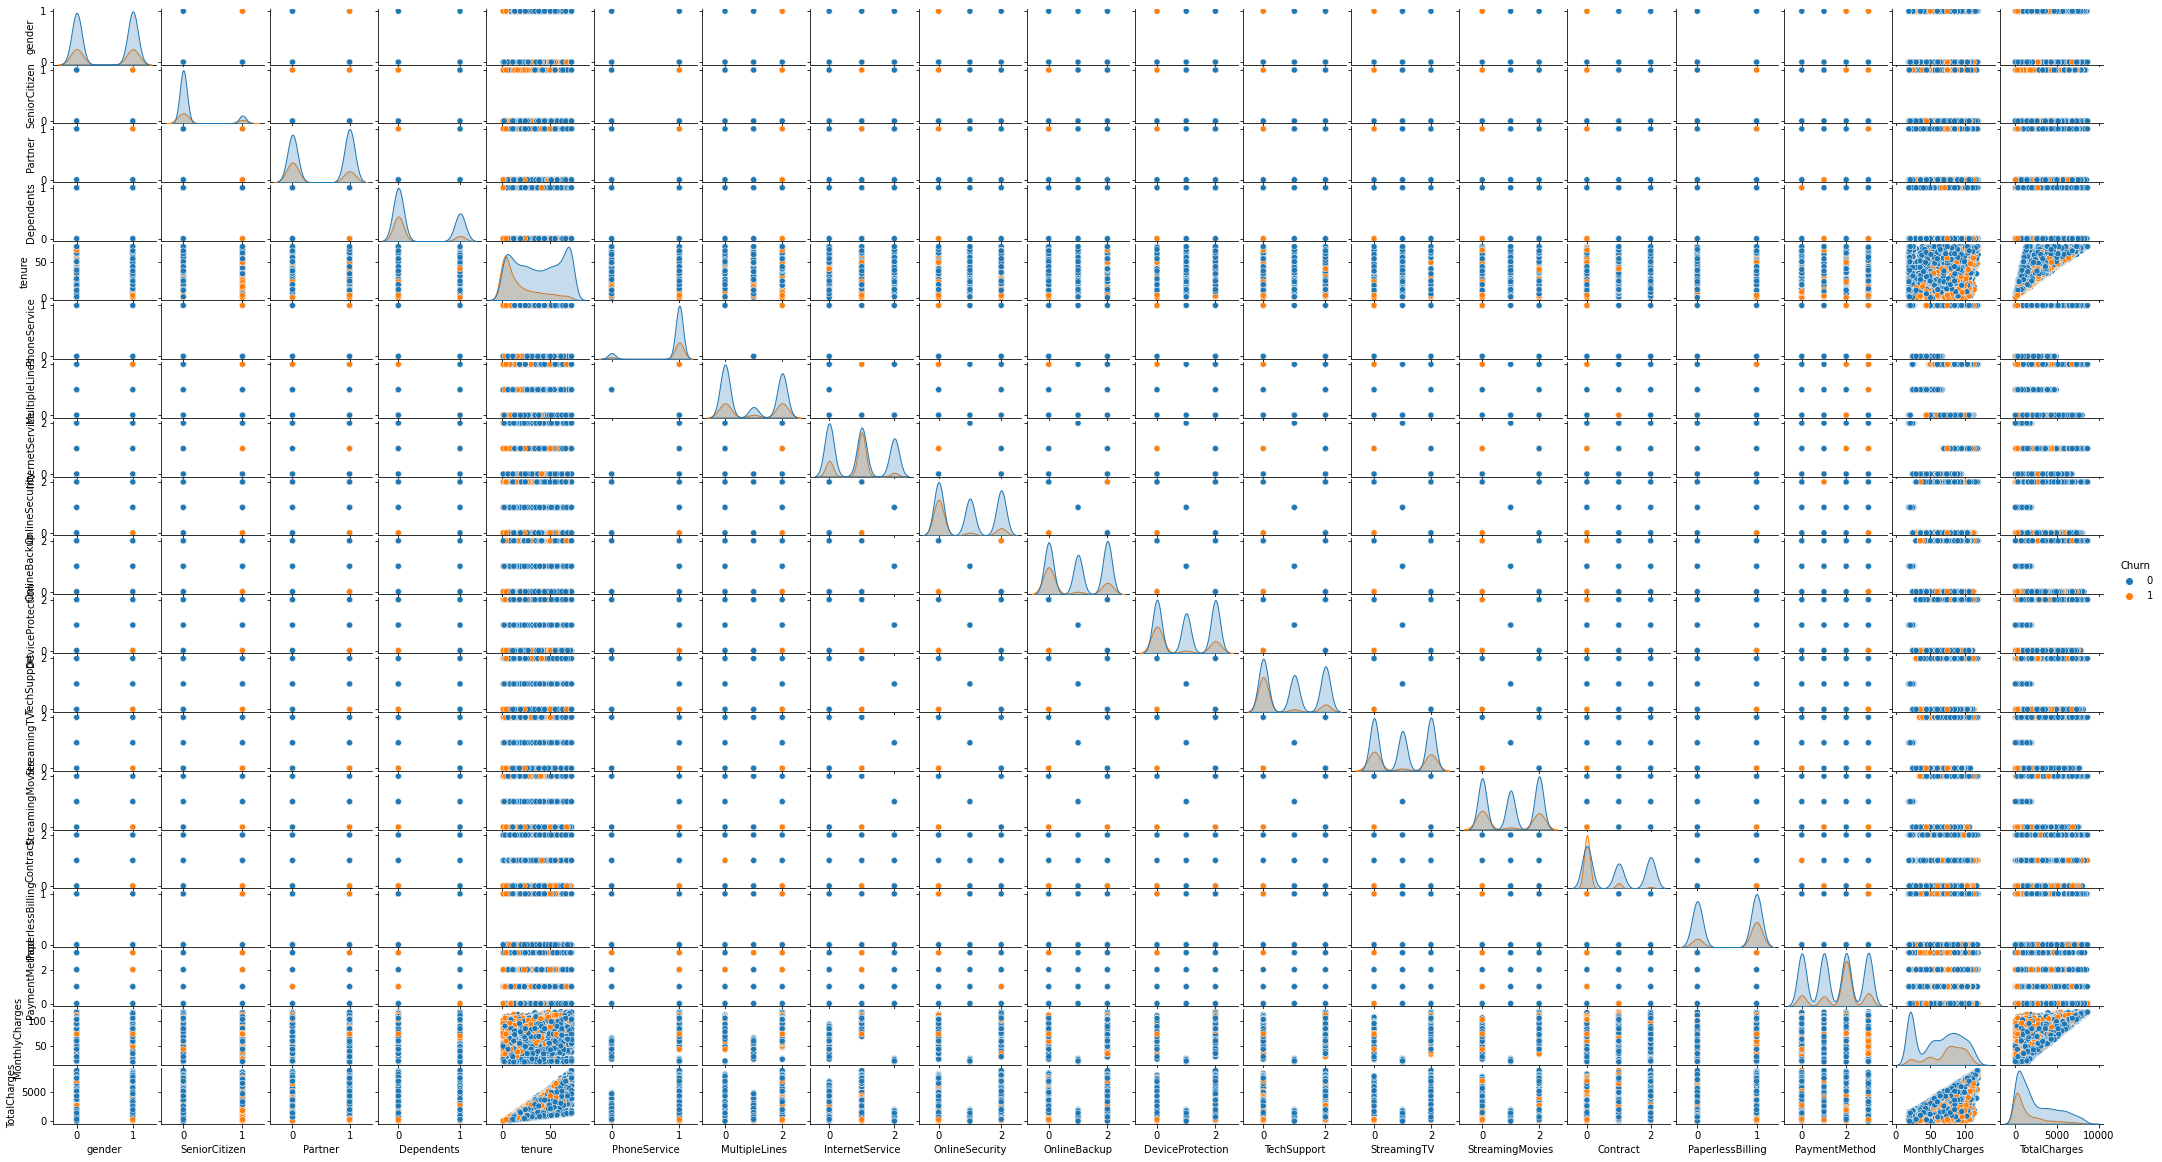

In [ ]:
# Checking Pair Plots -- All colmuns:
vars =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
# Building pair plot
sns.pairplot(df_enc,vars=vars, x_vars=vars, y_vars=vars,  hue='Churn')
plt.gcf().set_size_inches((30, 16))
plt.show()

In [ ]:
# Optional
df = data.copy()
df.drop('churn_class', axis=1, inplace= True )


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Check Feature Correlation:
## Building a correlation matrix

sns.set(style="white", font_scale =1.5)
corr = df.corr()
corr



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<ipython-input-103-b0445fc90f07>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


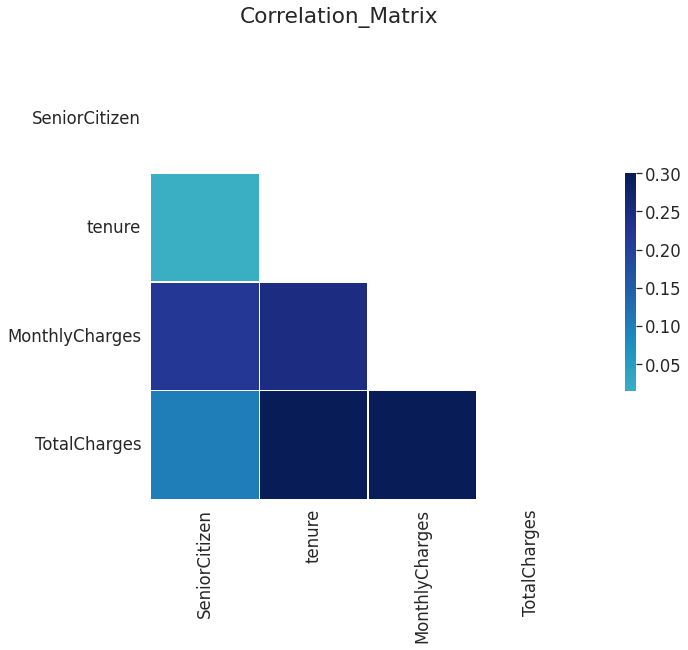

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Check Feature Correlation:
## Building a correlation matrix -- All columns

sns.set(style="white", font_scale =1.5)
corr2 = df_enc.corr()
corr2


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_class
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<ipython-input-94-363d0553722d>:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



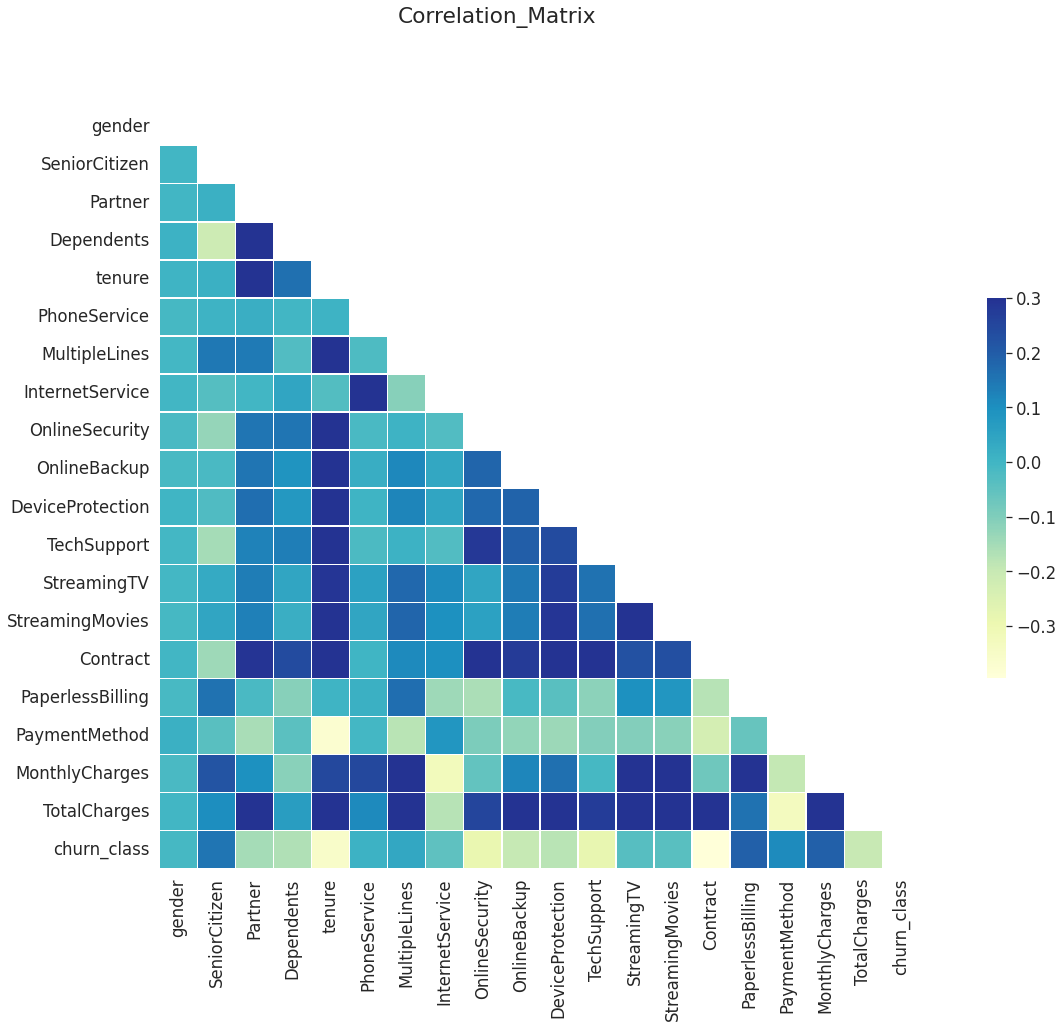

In [ ]:
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr2, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.gcf().set_size_inches((24, 14))

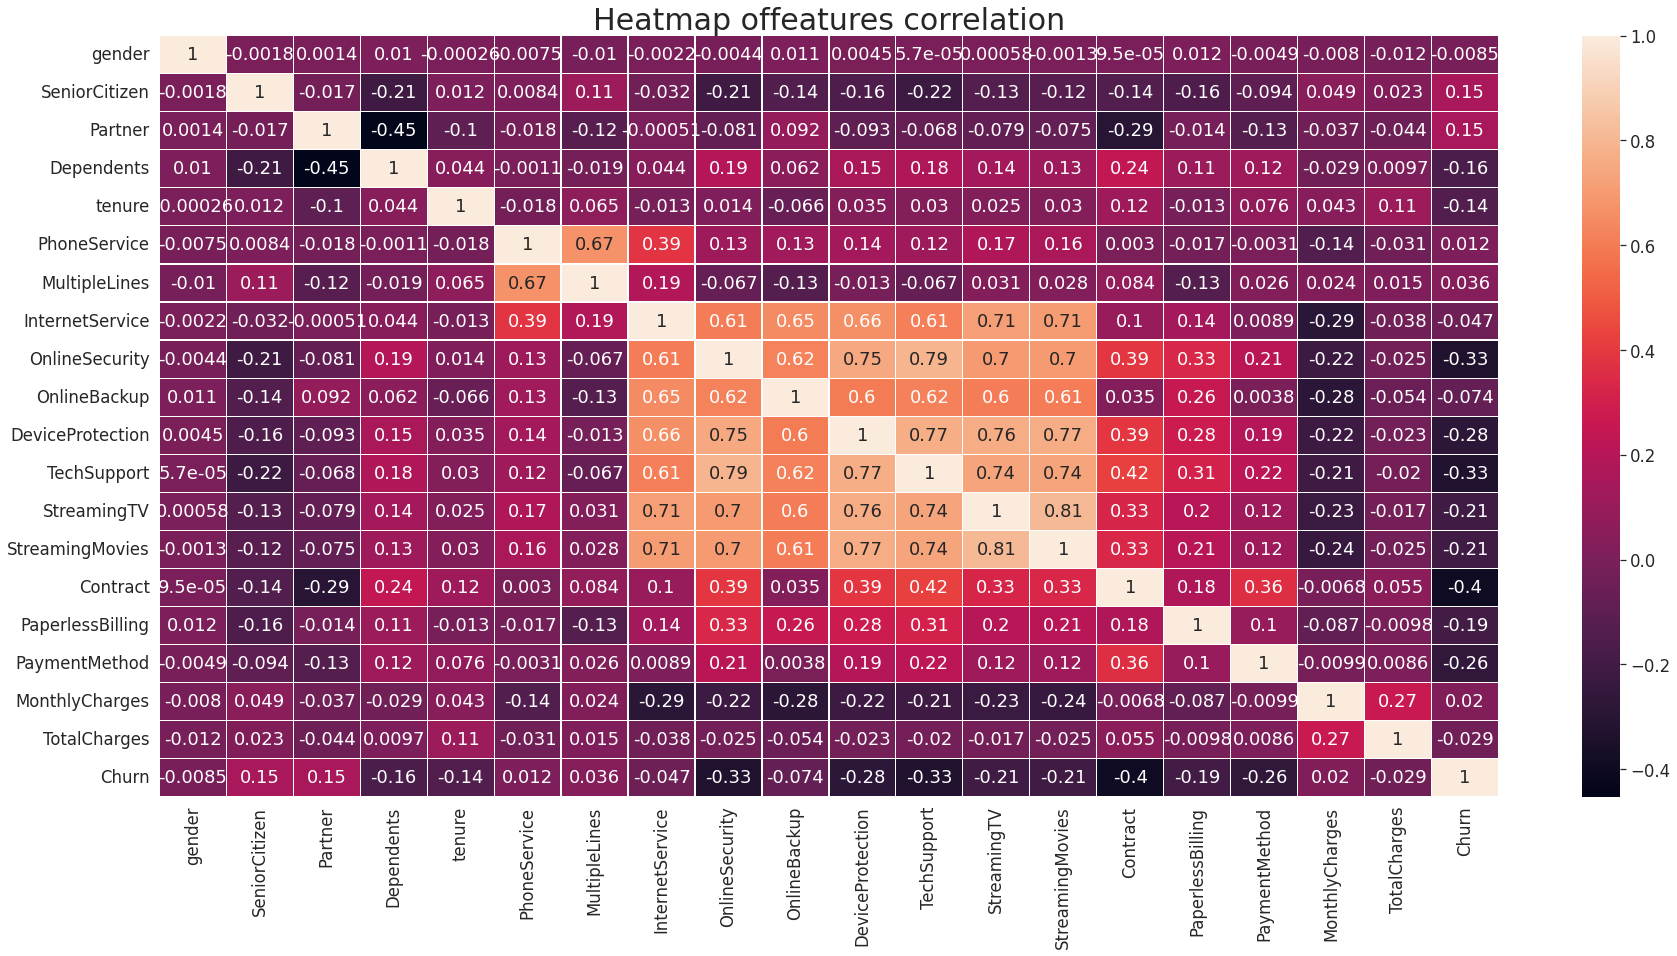

In [ ]:
# Another plot for correlation between features

sns.set(style="white", font_scale =1.5)
corr3 = df_enc.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr3, xticklabels = corr3.columns, yticklabels = corr3.columns, linewidths=0.2, annot = True)
plt.title('Heatmap offeatures correlation',  fontsize=30)
plt.gcf().set_size_inches((30, 14))

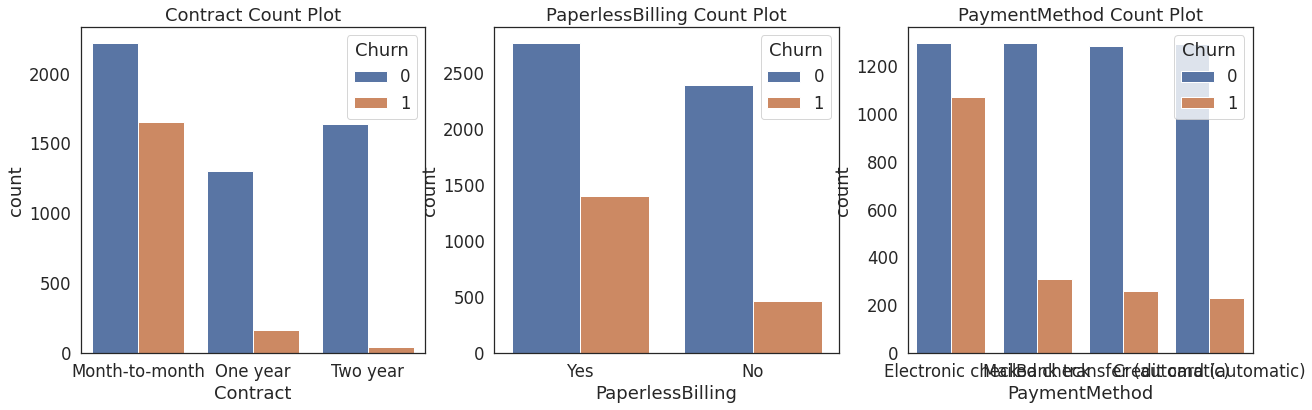

In [ ]:
# Customer account information

count_group(df,['Contract','PaperlessBilling','PaymentMethod'],set_hue='Churn',set_palette='deep')


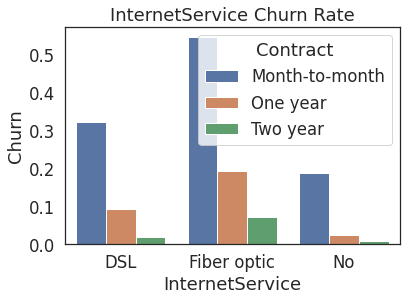

<Figure size 2160x1008 with 0 Axes>

In [ ]:
# Customer Account info
churn_rate(df,'InternetService','Contract')



> # Training section

The prepared dataset will be fetched to the model for training and testing purpose.



In [74]:
# Split the dataset

X = df_enc.drop("Churn",axis=1)
y = df_enc[["Churn"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True , random_state=99)

> ## XGBoost Train


In [71]:
# fit model 
xgb_est = XGBClassifier()
xgb_est.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier()

In [14]:
y_pred_class = xgb_est.predict(X_test)
y_pred_train = xgb_est.predict(X_train)

print('XGB Train Accuracy: {}'.format(accuracy_score(y_train, y_pred_train)))
print('XGB Test Acuuracy: {}'.format(accuracy_score(y_test, y_pred_class)))

XGB Train Accuracy: 0.8184888888888889
XGB Test Acuuracy: 0.8194740582800284


In [72]:
# make predictions 
y_pred_proba = xgb_est.predict_proba(X_test)
y_pred = xgb_est.predict(X_test)

y_test["predicted"] = y_pred
y_test["predicted_proba"] = y_pred_proba[:,1]
y_test.head()

,Churn,predicted,predicted_proba
6908,1,0,0.289999
6533,0,1,0.594028
1638,0,0,0.039585
5192,0,0,0.009845
7018,1,1,0.739213


> ## SVM Train


In [75]:
# fit model 

svm_est = SVC(gamma='auto', probability=True)
svm_est.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma='auto', probability=True)

In [16]:
y_pred_class = svm_est.predict(X_test)
y_pred_train = svm_est.predict(X_train)

print('SVM Train Accuracy: {}'.format(accuracy_score(y_train, y_pred_train)))
print('SVM Test Accuracy: {}'.format(accuracy_score(y_test, y_pred_class)))

SVM Train Accuracy: 0.9568
SVM Test Accuracy: 0.7839374555792467


Text(0.5, 0, 'Permutation Importance')

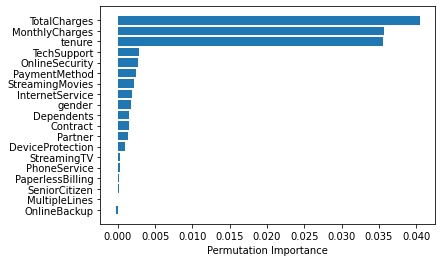

In [17]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(svm_est, X_test, y_test)


features = X.columns

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [76]:
# make predictions 
y_pred_proba = svm_est.predict_proba(X_test)
y_pred = svm_est.predict(X_test)

y_test["predicted"] = y_pred
y_test["predicted_proba"] = y_pred_proba[:,1]
y_test.head()

,Churn,predicted,predicted_proba
6908,1,0,0.191530
6533,0,0,0.238969
1638,0,0,0.225988
5192,0,0,0.161274
7018,1,1,0.843598


> ## Random Forest Train


In [41]:
# fit model 
rf_est = RandomForestClassifier(max_depth=10, random_state=0)
rf_est.fit(X_train, y_train)

<ipython-input-41-e0584524caf7>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=10, random_state=0)

In [42]:
y_pred_class = rf_est.predict(X_test)
y_pred_train = rf_est.predict(X_train)

print('Random Forest Train Accuracy: {}'.format(accuracy_score(y_train, y_pred_train)))
print('Random Forest Test Acuuracy: {}'.format(accuracy_score(y_test, y_pred_class)))

Random Forest Train Accuracy: 0.8926222222222222
Random Forest Test Acuuracy: 0.8166311300639659


In [43]:
# make predictions 
y_pred_proba = rf_est.predict_proba(X_test)
y_pred = rf_est.predict(X_test)

y_test["predicted"] = y_pred
y_test["predicted_proba"] = y_pred_proba[:,1]
y_test.head()

,Churn,predicted,predicted_proba
6908,1,0,0.226247
6533,0,0,0.431511
1638,0,0,0.047961
5192,0,0,0.007035
7018,1,1,0.719237


> # Evaluation section

After the model was trained and tested, we want to measure the performance of our model. Here we will plot the confusion matrix, AUC, proba disribution, and feature importance from the model.




> ## XGBoost Evaluation

In [28]:
# feature_importance

feature_importance = pd.DataFrame()
feature_importance["feature"] = X.columns
feature_importance["value"] = xgb_est.feature_importances_
feature_importance = feature_importance.sort_values("value", ascending=False).reset_index(drop=True)


In [73]:
metrics.roc_auc_score( y_test.Churn, y_test.predicted_proba )

0.8616477795598558

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


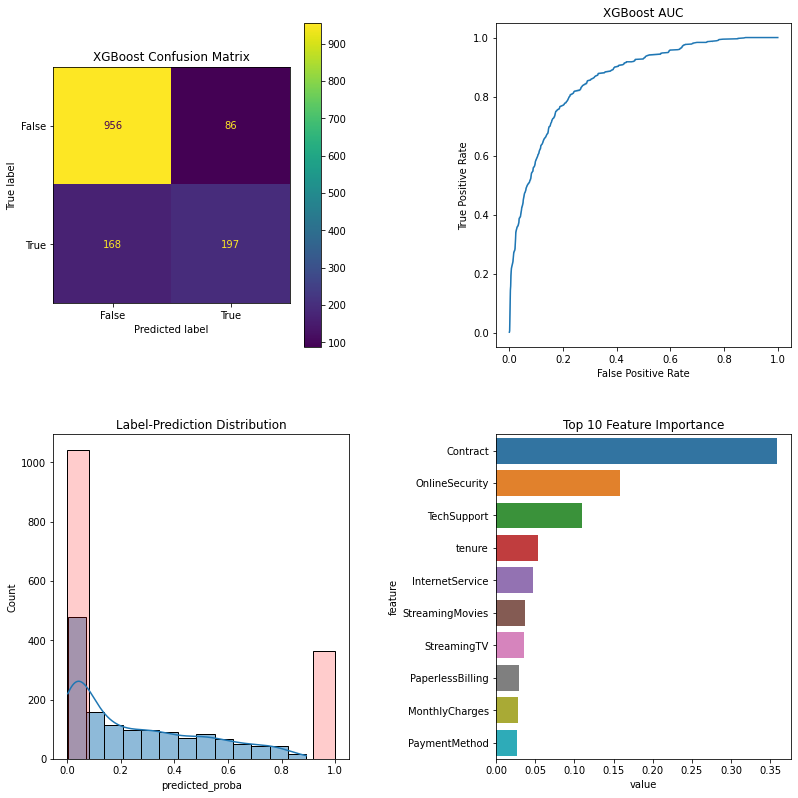

In [29]:
## ref: https://www.kaggle.com/code/irfandahusnisahid/customer-churn-prediction-using-xgboost


fig,ax = plt.subplots(2,2,figsize=(12,12))
confusion_matrix = metrics.confusion_matrix(y_test.Churn, y_test.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(ax=ax[0,0])
ax[0,0].set_title("XGBoost Confusion Matrix")

fpr, tpr, _ = metrics.roc_curve(y_test.Churn, y_test.predicted_proba)
sns.lineplot(fpr,tpr,ax=ax[0,1])
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title("XGBoost AUC")

sns.histplot(y_test.predicted_proba,kde=True,ax=ax[1,0])
sns.histplot(y_test.Churn,kde=False,ax=ax[1,0], color="red",alpha=0.2)
ax[1,0].set_title("Label-Prediction Distribution")

sns.barplot(data=feature_importance.iloc[0:10],x="value",y="feature",ax=ax[1,1])
ax[1,1].set_title("Top 10 Feature Importance")

fig.tight_layout(pad=4.0)
plt.show()

In [31]:
y_test

,Churn,predicted,predicted_proba
6908,1,0,0.289999
6533,0,1,0.594028
1638,0,0,0.039585
5192,0,0,0.009845
7018,1,1,0.739213
...,...,...,...
1200,0,0,0.276244
984,0,0,0.005046
173,1,0,0.136151
2824,0,0,0.017969


In [32]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 

## If you're using the second cleaning, you can use the following command:
#xgb_predictions = xgb_est.predict(tvec.transform(X_test_cleaned))   

## Otherwise, use these commands:
xgb_preds = xgb_est.predict(X_test)

report = metrics.classification_report(y_test.Churn,xgb_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.850000,0.920000,0.880000,1042.000000
1,0.700000,0.540000,0.610000,365.000000
accuracy,0.820000,0.820000,0.820000,0.820000
macro avg,0.770000,0.730000,0.750000,1407.000000
weighted avg,0.810000,0.820000,0.810000,1407.000000


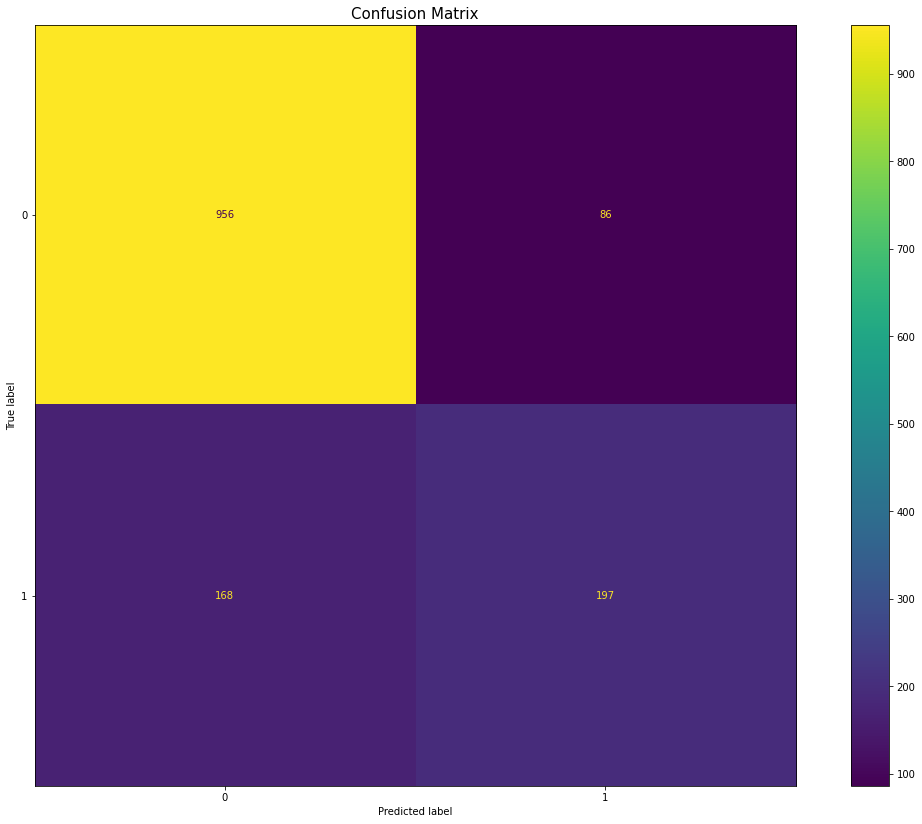

In [33]:
# First type of Confusion matrix

cm = metrics.confusion_matrix(y_test.Churn, xgb_preds, labels=xgb_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=xgb_est.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

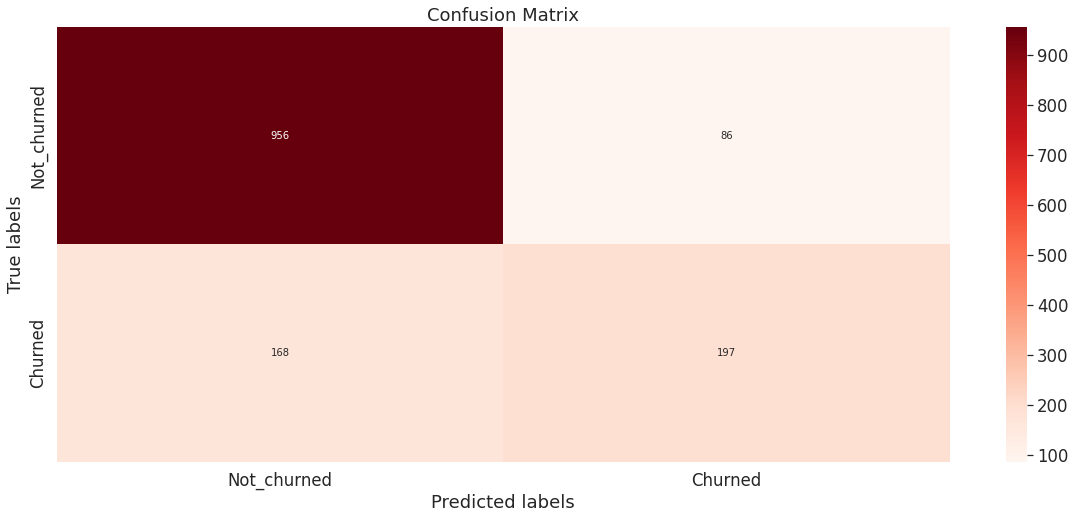

In [ ]:
# Second type of confusion matrix

ax= plt.subplot()
cm= metrics.confusion_matrix(y_test,xgb_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not_churned', 'Churned']); ax.yaxis.set_ticklabels(['Not_churned', 'Churned']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [ ]:
import plotly.figure_factory as ff

x_axes = ['Not_churned', 'churned']
y_axes =  ['churned', 'Not_churned']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [ ]:
# Third type of confusion Matrix

conf_matrix(metrics.confusion_matrix(y_test, xgb_preds))


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

> #### Save the XGB model 

In [34]:
import pickle 


filename = "xgb_est.sav"

# Save the trained model as a pickle string.
pickle.dump(xgb_est,open(filename, "wb") )

## Load the pickled model
xgb_from_pickle = pickle.load(open(filename, "rb"))


# Use the loaded pickled model to make predictions
print("*************  The model results:  ***********\n", xgb_from_pickle.predict(X_test))




*************  The model results:  ***********
 [0 1 0 ... 0 0 0]


> ## SVM evaluation

In [24]:
# For SVM model, I used permutation_importance instead. Because feature importance method requires tree based algorithm


permutation_importance = pd.DataFrame()

features = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

permutation_importance["feature"]= features[sorted_idx]
permutation_importance["value"] = perm_importance.importances_mean[sorted_idx]
permutation_importance = permutation_importance.sort_values("value", ascending=False).reset_index(drop=True)


In [25]:
permutation_importance

,feature,value
0,TotalCharges,4.051173e-02
1,MonthlyCharges,3.567875e-02
2,tenure,3.553660e-02
3,TechSupport,2.842928e-03
4,OnlineSecurity,2.700782e-03
5,PaymentMethod,2.416489e-03
6,StreamingMovies,2.132196e-03
7,InternetService,1.847903e-03
8,gender,1.705757e-03
9,Dependents,1.563611e-03


In [77]:
metrics.roc_auc_score( y_test.Churn, y_test.predicted_proba )

0.7352706859832252

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


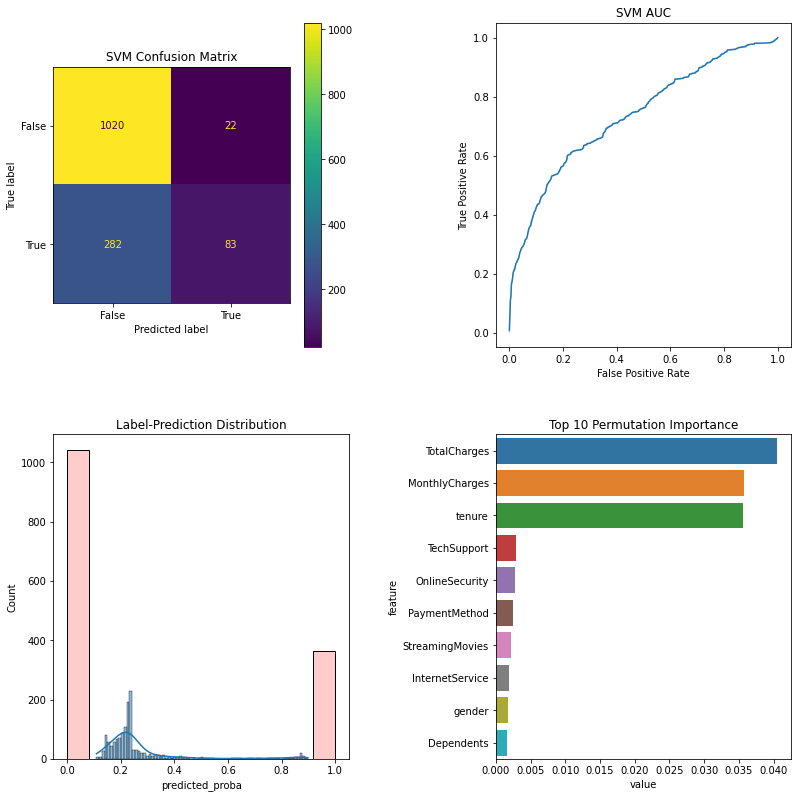

In [28]:
## ref: https://www.kaggle.com/code/irfandahusnisahid/customer-churn-prediction-using-xgboost


fig,ax = plt.subplots(2,2,figsize=(12,12))
confusion_matrix = metrics.confusion_matrix(y_test.Churn, y_test.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(ax=ax[0,0])
ax[0,0].set_title("SVM Confusion Matrix")

fpr, tpr, _ = metrics.roc_curve(y_test.Churn, y_test.predicted_proba)
sns.lineplot(fpr,tpr,ax=ax[0,1])
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title("SVM AUC")

sns.histplot(y_test.predicted_proba,kde=True,ax=ax[1,0])
sns.histplot(y_test.Churn,kde=False,ax=ax[1,0], color="red",alpha=0.2)
ax[1,0].set_title("Label-Prediction Distribution")

sns.barplot(data=permutation_importance.iloc[0:10],x="value",y="feature",ax=ax[1,1])
ax[1,1].set_title("Top 10 Permutation Importance")

fig.tight_layout(pad=4.0)
plt.show()

In [ ]:
y_test

,Churn,predicted,predicted_proba
6908,1,0,0.289999
6533,0,1,0.594028
1638,0,0,0.039585
5192,0,0,0.009845
7018,1,1,0.739213
...,...,...,...
1200,0,0,0.276244
984,0,0,0.005046
173,1,0,0.136151
2824,0,0,0.017969


In [29]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 


## Otherwise, use these commands:
svm_preds = svm_est.predict(X_test)

report = metrics.classification_report(y_test.Churn,svm_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.780000,0.980000,0.870000,1042.000000
1,0.790000,0.230000,0.350000,365.000000
accuracy,0.780000,0.780000,0.780000,0.780000
macro avg,0.790000,0.600000,0.610000,1407.000000
weighted avg,0.790000,0.780000,0.740000,1407.000000


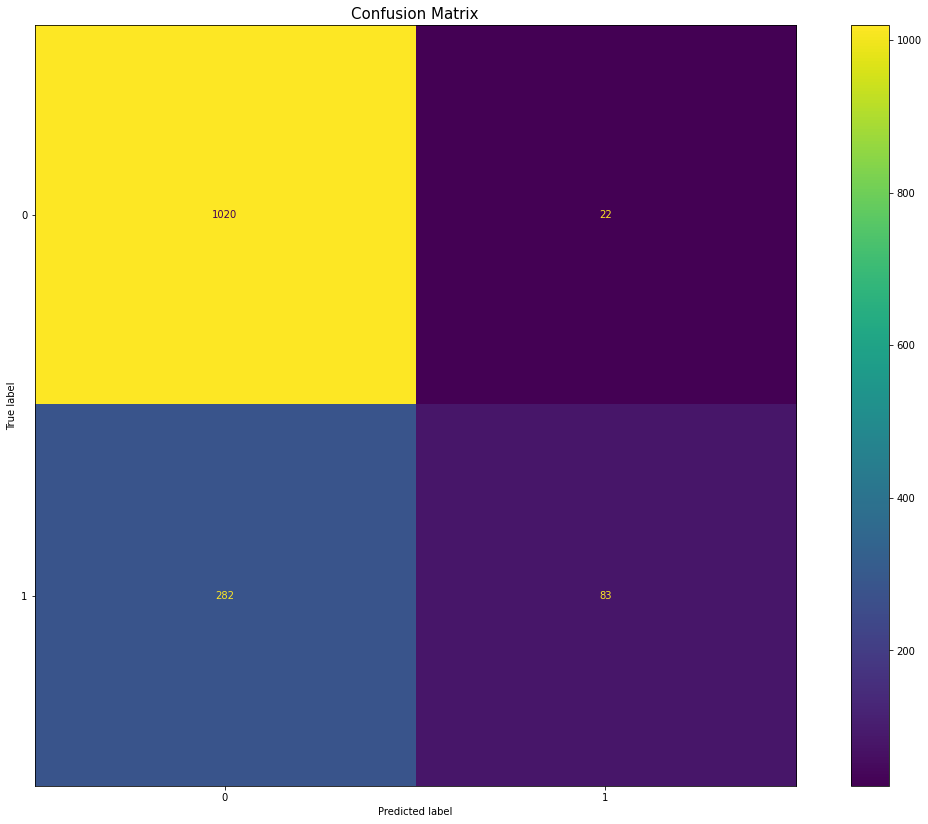

In [30]:
# First type of Confusion matrix

cm = metrics.confusion_matrix(y_test.Churn, svm_preds, labels=svm_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=svm_est.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

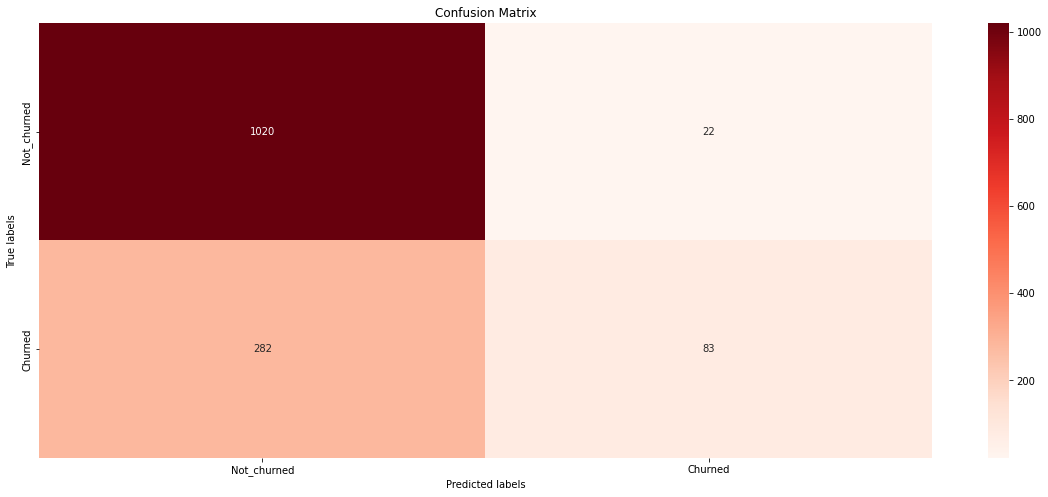

In [32]:
# Second type of confusion matrix

ax= plt.subplot()
cm= metrics.confusion_matrix(y_test.Churn,svm_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not_churned', 'Churned']); ax.yaxis.set_ticklabels(['Not_churned', 'Churned']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [33]:
import plotly.figure_factory as ff

x_axes = ['Not_churned', 'churned']
y_axes =  ['churned', 'Not_churned']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [35]:
# Third type of confusion Matrix

conf_matrix(metrics.confusion_matrix(y_test.Churn, svm_preds))


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

> #### Save the XGB model 

In [69]:
import pickle 


filename = "svm_est.sav"

# Save the trained model as a pickle string.
pickle.dump(svm_est,open(filename, "wb") )

## Load the pickled model
svm_from_pickle = pickle.load(open(filename, "rb"))


# Use the loaded pickled model to make predictions
print("*************  The model results:  ***********\n", svm_from_pickle.predict(X_test))




*************  The model results:  ***********
 [0 0 0 ... 0 0 0]


> ## Random Forest evaluation

In [44]:
# feature_importance

feature_importance = pd.DataFrame()
feature_importance["feature"] = X.columns
feature_importance["value"] = rf_est.feature_importances_
feature_importance = feature_importance.sort_values("value", ascending=False).reset_index(drop=True)


In [49]:
metrics.roc_auc_score( y_test.Churn, y_test.predicted_proba )

0.8522664528172904

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



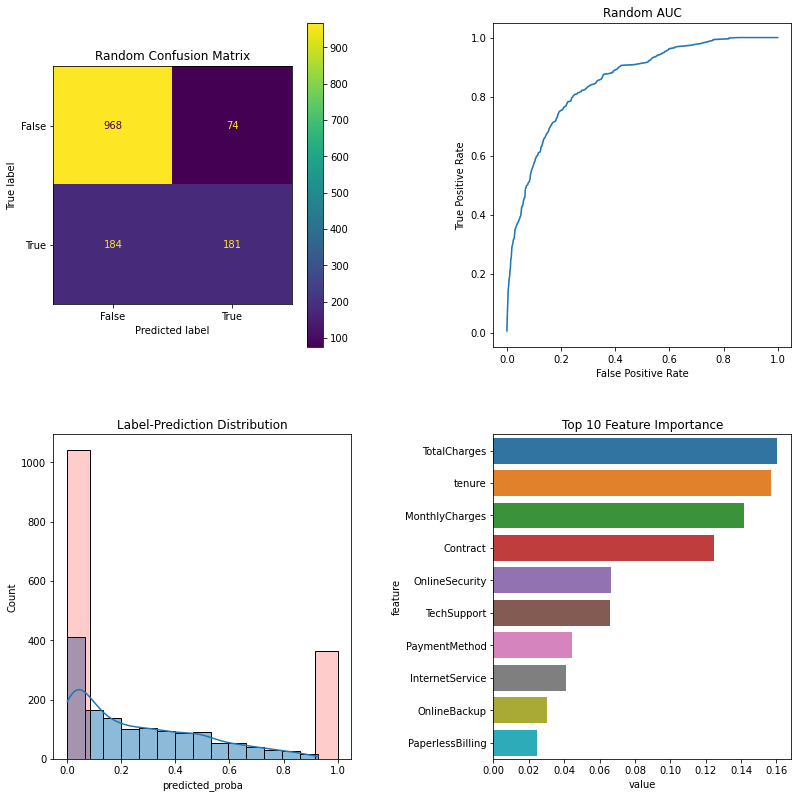

In [45]:
## ref: https://www.kaggle.com/code/irfandahusnisahid/customer-churn-prediction-using-xgboost


fig,ax = plt.subplots(2,2,figsize=(12,12))
confusion_matrix = metrics.confusion_matrix(y_test.Churn, y_test.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(ax=ax[0,0])
ax[0,0].set_title("Random Confusion Matrix")

fpr, tpr, _ = metrics.roc_curve(y_test.Churn, y_test.predicted_proba)
sns.lineplot(fpr,tpr,ax=ax[0,1])
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title("Random AUC")

sns.histplot(y_test.predicted_proba,kde=True,ax=ax[1,0])
sns.histplot(y_test.Churn,kde=False,ax=ax[1,0], color="red",alpha=0.2)
ax[1,0].set_title("Label-Prediction Distribution")

sns.barplot(data=feature_importance.iloc[0:10],x="value",y="feature",ax=ax[1,1])
ax[1,1].set_title("Top 10 Feature Importance")

fig.tight_layout(pad=4.0)
plt.show()

In [ ]:
y_test

,Churn,predicted,predicted_proba
6908,1,0,0.289999
6533,0,1,0.594028
1638,0,0,0.039585
5192,0,0,0.009845
7018,1,1,0.739213
...,...,...,...
1200,0,0,0.276244
984,0,0,0.005046
173,1,0,0.136151
2824,0,0,0.017969


In [50]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 

## If you're using the second cleaning, you can use the following command:
#xgb_predictions = xgb_est.predict(tvec.transform(X_test_cleaned))   

## Otherwise, use these commands:
rf_preds = rf_est.predict(X_test)

report = metrics.classification_report(y_test.Churn,rf_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.840000,0.930000,0.880000,1042.000000
1,0.710000,0.500000,0.580000,365.000000
accuracy,0.820000,0.820000,0.820000,0.820000
macro avg,0.780000,0.710000,0.730000,1407.000000
weighted avg,0.810000,0.820000,0.800000,1407.000000


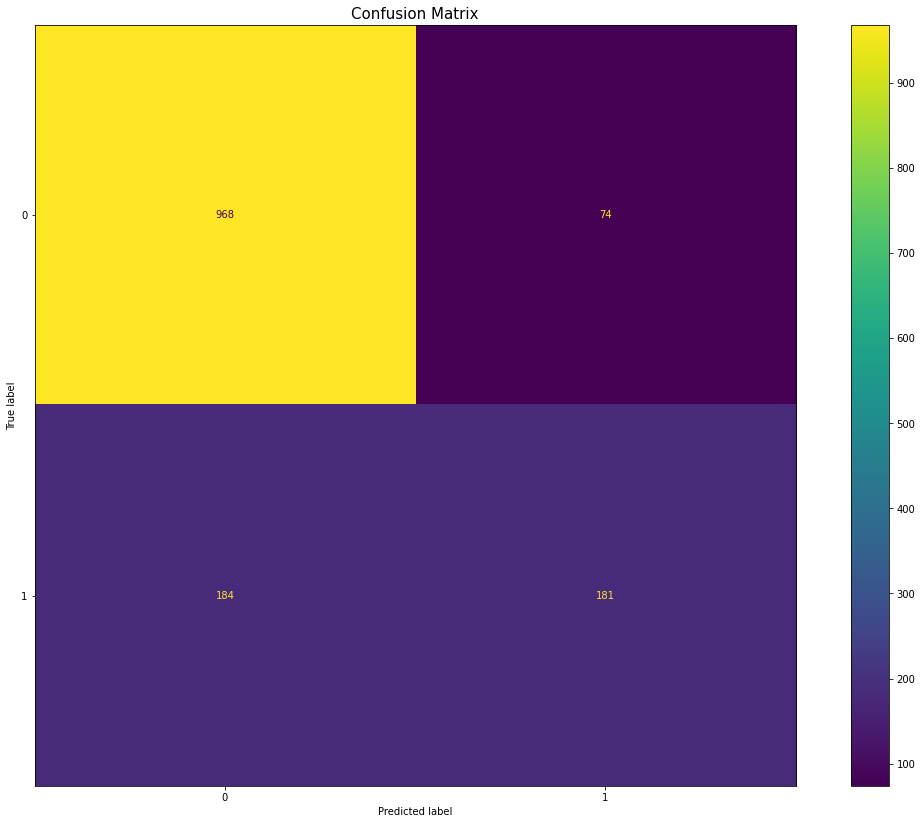

In [51]:
# First type of Confusion matrix

cm = metrics.confusion_matrix(y_test.Churn, rf_preds, labels=rf_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=rf_est.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

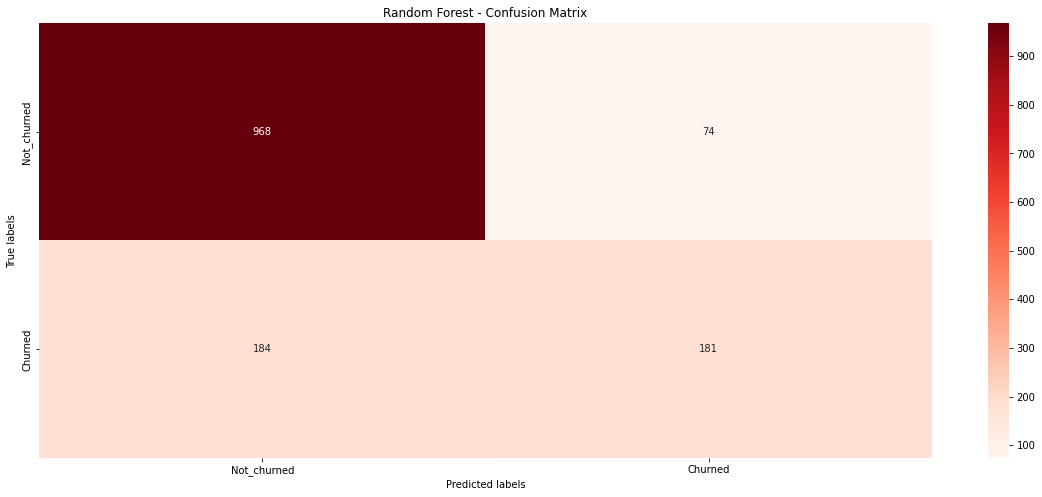

In [55]:
# Second type of confusion matrix

ax= plt.subplot()
cm= metrics.confusion_matrix(y_test.Churn,rf_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Random Forest - Confusion Matrix');
ax.xaxis.set_ticklabels(['Not_churned', 'Churned']); ax.yaxis.set_ticklabels(['Not_churned', 'Churned']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [66]:
import plotly.figure_factory as ff

x_axes = ['Not_churned', 'churned']
y_axes =  ['churned', 'Not_churned']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Random Forest - Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value'),
                      
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [67]:
# Third type of confusion Matrix

conf_matrix(metrics.confusion_matrix(y_test.Churn, rf_preds))


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

> #### Save the XGB model 

In [68]:
import pickle 


filename = "rf_est.sav"

# Save the trained model as a pickle string.
pickle.dump(rf_est,open(filename, "wb") )

## Load the pickled model
rf_from_pickle = pickle.load(open(filename, "rb"))


# Use the loaded pickled model to make predictions
print("*************  The model results:  ***********\n", rf_from_pickle.predict(X_test))




*************  The model results:  ***********
 [0 0 0 ... 0 0 0]
